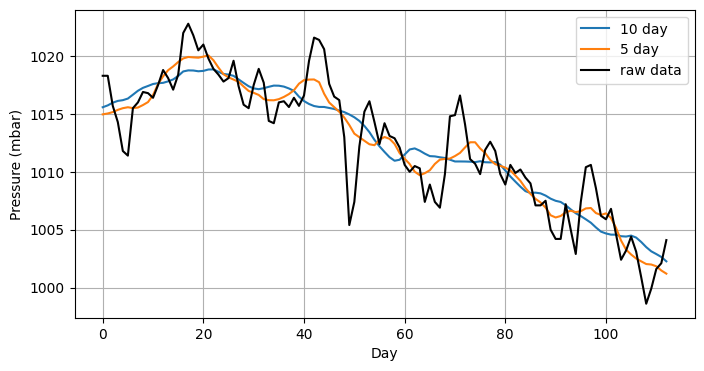

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def moving_average(x, k):
    n = len(x)
    y = np.zeros(n)

    for i in range(0, n):
        y[i] = np.average(x[max(i-k, 0):min(i+k+1, n)])
    
    return y

pressure_data = [1018.3, 1018.3, 1015.7, 1014.3, 1011.8, 1011.4, 1015.5, 1016.0, 1016.9, 1016.8, 1016.4, 1017.5, 1018.8, 1018.1, 1017.1, 1018.4, 1022.0, 1022.8, 1021.8, 1020.5, 1021.0, 1019.8, 1018.9, 1018.4, 1017.8, 1018.1, 1019.6, 1017.4, 1015.8, 1015.5, 1017.5, 1018.9, 1017.7, 1014.4, 1014.2, 1016.0, 1016.1, 1015.6, 1016.4, 1015.7, 1016.6, 1019.6, 1021.6, 1021.4, 1020.6, 1017.6, 1016.5, 1016.2, 1013.0, 1005.4, 1007.4, 1012.2, 1015.2, 1016.1, 1014.3, 1012.4, 1014.2, 1013.1, 1012.9, 1012.1, 1010.6, 1010.0, 1010.5, 1010.3, 1007.4, 1008.9, 1007.4, 1006.9, 1009.8, 1014.8, 1014.9, 1016.6, 1014.1, 1011.1, 1010.7, 1009.8, 1011.9, 1012.6, 1011.8, 1009.8, 1008.9, 1010.6, 1009.9, 1010.2, 1009.5, 1009.0, 1007.1, 1007.1, 1007.5, 1005.0, 1004.2, 1004.2, 1007.2, 1005.0, 1002.9, 1007.4, 1010.4, 1010.6, 1008.6, 1006.2, 1005.9, 1006.8, 1004.6, 1002.4, 1003.2, 1004.4, 1003.1, 1000.9, 998.6, 999.9, 1001.6, 1002.1, 1004.1]

fig = plt.figure(figsize=(8, 4))
plt.plot(moving_average(pressure_data, 10), label="10 day")
plt.plot(moving_average(pressure_data, 5), label="5 day")
plt.plot(pressure_data, label="raw data", color="black")
plt.grid()
plt.xlabel("Day")
plt.ylabel("Pressure (mbar)")
plt.legend()

glue("moving_average", fig, display=False)

fig2 = plt.figure(figsize=(6, 3))
plt.plot(pressure_data, label="raw data", color="black")
plt.grid()
plt.xlabel("Day")
plt.ylabel("Pressure (mbar)")
glue("pressure", fig2, display=False)

# Workshop 4: Modelling Space

We've already seen that we can use arrays to store one-dimensional sequences of numerical data. Such data might represent a time series of measurements, such as daily recordings of atmospheric pressure ({numref}`pressure_fig`) where the value `x[i]` in the array `x` corresponds to the pressure on day `i`.

```{glue:figure} pressure
:figwidth: 400px
:name: "pressure_fig"

Atmospheric pressure measured for 113 consecutive days.
```
On the other hand, we might need to work with data that is two-dimensional, such as recordings of atmospheric pressure over a rectangular region. The values in the array are then indexed by two numbers so that `x[i, j]` corresponds to the pressure at the coordinate `i, j`. Such arrays can be represented as a heat map, which is an image where the intensity of each pixel represents the value of the array element ({numref}`pressure_2d_fig`).

```{glue:figure} pressure_2d
:figwidth: 400px
:name: "pressure_2d_fig"

Atmospheric pressure over a 2d rectangular area.
```

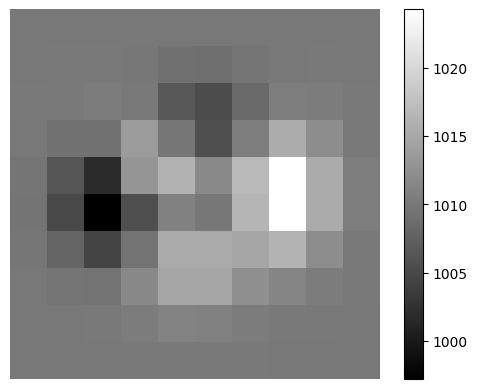

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img


z = np.loadtxt("pressure_2d.txt")

fig = plt.figure()
plt.imshow(z, cmap="gray");
plt.axis("off");
plt.colorbar(label="Pressure (mbar)");
glue("pressure_2d", fig, display=False)

## 1D Moving Average

A **moving average** is commonly used when visualising time series data in order to smooth out short-term fluctuations in the data. {numref}`moving_average_fig` shows 113 days of atmospheric pressure along with the 10-day and 5-day moving averages.

```{glue:figure} moving_average
:figwidth: 600px
:name: "moving_average_fig"

Atmospheric pressure measured for 113 consecutive days, along with 10-day and 5-day moving averages, where the $k$-day moving averages are taken over $2k+1$ measurements centred at each day.
```



In this workshop, we define the **k-moving average** of an array as the array formed by averaging $k$ values on either side of each element (a total of $2k + 1$ elements). For example, given a sequence of values $x_i$ then the 1-moving average $y_i$ is defined by (see {numref}`moving_average_def`):

$$y_i = (x_{i-1} + x_i + x_{i+1})/3.$$


```{figure} moving_average.png
:height: 300px
:name: moving_average_def
Calculate the 1-moving average of an array as the mean of consecutive triples.
```

We can calculate the 1-moving average in Python as follows.

In [1]:
import numpy as np

x = np.array([1.0, 5.0, 3.4, 2.1, 6.5, 2.4, 3.1])
n = len(x)

y = np.zeros(n)

for i in range(1, n - 1):
    y[i] = (x[i-1] + x[i] + x[i+1]) / 3

print("1-moving average:", y)

1-moving average: [0.         3.13333333 3.5        4.         3.66666667 4.
 0.        ]


A more compact way to calculate the sum of consecutive elements is using `numpy` slice notation. We can replace `(x[i-1] + x[i] + x[i+1])/3` with `np.average(x[i-1:i+2])`. `x[a:b]` represents the subarray from `a` to `b` (*including* the lower limit but *excluding* the upper limit).

In [2]:
y = np.zeros(n)
for i in range(1, n - 1):
    y[i] = np.average(x[i-1:i+2]) 

print("1-moving average:", y)

1-moving average: [0.         3.13333333 3.5        4.         3.66666667 4.
 0.        ]


Notice that when `i=0` or `i=n` the subarray `x[i-1:i+2]` would include elements outside the bounds of the array `x`. The `for` loop therefore excludes the first and last element in its `range` function and we end up with zeros padding the start and end of the array.

:::{exercise} 
:label: exercise_4_5
Calculate the 2-moving average of `x`. You should get the following result:

```
[0.   0.   3.6  3.88 3.5  0.   0.  ]
```
:::


:::{exercise} 
:label: exercise_4_6
Write a function `moving_average(x, k)` which returns an array containing the `k`-moving average of `x`.

```
def moving_average(x, k):
    n = len(x)
    y = np.zeros(n)

    # your code
    
    return y
```

Check that `moving_average(x, 1)` and `moving_average(x, 2)` produce the correct 1- and 2-moving averages, as previously calculated.
:::

Instead of padding the start and end of the array with zeros, we can simply average only the elements of the subarray `x[i-1:i+2]` which lie within the bounds of `x`. In the case of the 1-moving average we can achieve this by replacing the lower limit with `max(i-1, 0)` and the upper limit with `min(i+2, n)`. We also change the `for` loop to include the full range from `0` to `n`.

In [7]:
y = np.zeros(n)
for i in range(0, n):
    y[i] = np.average(x[max(i-1,0):min(i+2, n)]) 

print("1-moving average:", y)

1-moving average: [3.         3.13333333 3.5        4.         3.66666667 4.
 2.75      ]


:::{exercise} 
:label: exercise_4_7
Change your function `moving_average(x, k)` to remove the zero-padding.
:::

The array `pressure_data` contains the atmospheric pressure (measured in millibars) shown in {numref}`pressure_fig`.

In [10]:
pressure_data = [1018.3, 1018.3, 1015.7, 1014.3, 1011.8, 1011.4, 1015.5, 1016.0, 1016.9, 1016.8, 1016.4, 1017.5, 1018.8, 1018.1, 1017.1, 1018.4, 1022.0, 1022.8, 1021.8, 1020.5, 1021.0, 1019.8, 1018.9, 1018.4, 1017.8, 1018.1, 1019.6, 1017.4, 1015.8, 1015.5, 1017.5, 1018.9, 1017.7, 1014.4, 1014.2, 1016.0, 1016.1, 1015.6, 1016.4, 1015.7, 1016.6, 1019.6, 1021.6, 1021.4, 1020.6, 1017.6, 1016.5, 1016.2, 1013.0, 1005.4, 1007.4, 1012.2, 1015.2, 1016.1, 1014.3, 1012.4, 1014.2, 1013.1, 1012.9, 1012.1, 1010.6, 1010.0, 1010.5, 1010.3, 1007.4, 1008.9, 1007.4, 1006.9, 1009.8, 1014.8, 1014.9, 1016.6, 1014.1, 1011.1, 1010.7, 1009.8, 1011.9, 1012.6, 1011.8, 1009.8, 1008.9, 1010.6, 1009.9, 1010.2, 1009.5, 1009.0, 1007.1, 1007.1, 1007.5, 1005.0, 1004.2, 1004.2, 1007.2, 1005.0, 1002.9, 1007.4, 1010.4, 1010.6, 1008.6, 1006.2, 1005.9, 1006.8, 1004.6, 1002.4, 1003.2, 1004.4, 1003.1, 1000.9, 998.6, 999.9, 1001.6, 1002.1, 1004.1]

:::{exercise} 
:label: exercise_4_8
Plot the atmospheric pressure data on a line graph. On the same graph, plot the 5- and 10-moving averages (as shown in {numref}`moving_average_fig`).
:::

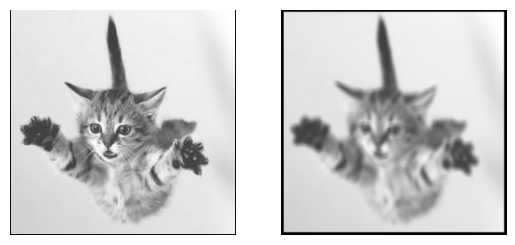

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

x = np.loadtxt("falling_cat.txt")

n, m = x.shape
y = np.zeros((n, m))
k = 3

for i in range(k, n-k):
    for j in range(k, m-k):
        sub_array = x[i-k:i+k+1,j-1:j+k+1]
        y[i,j] = np.average(sub_array)

fig, (ax1, ax2) = plt.subplots(1, 2);
ax1.imshow(x, cmap="gray");
ax1.axis("off");
ax2.imshow(y, cmap="gray");
ax2.axis("off");

glue("cats", fig, display=False);

## 2D Moving Average

We can extend the definition of moving average to 2-dimensional data. One application of moving averages on 2-dimensional data is smoothing images. In {numref}`cats_fig` the image on the left is an `n` by `m` array where the colour intensity of each pixel corresponds to the value of each array element. Applying a 2-dimensional moving average to each pixel result in the smoothed image on the right.

```{glue:figure} cats
:figwidth: 600px
:name: "cats_fig"

An image before (left) and after (right) 2-dimensional averaging.
```

The 2-dimensional 1-moving average is calculated by taking the average of the 9 values in the 3 by 3 sub-array centred at each element (see figure {numref}`moving_average_2d_fig`). In the example below we do this calculation for a single cell `x[1,1]` of a 5 by 5 array `x`.

```{figure} moving_average_2d.jpg
:height: 150px
:name: "moving_average_2d_fig"

The 1-moving average of the cell at position `1, 1` is the average of the 9 surrounding cells.
```

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0, 0, 0, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 0, 0, 0, 0]])

# calculate the 2d moving average of the cell x[1, 1]
sub_array = x[0:3, 0:3]
average = np.average(sub_array)

print("3 by 3 sub array:\n", sub_array)
print("average:", average)



3 by 3 sub array:
 [[0 0 0]
 [0 6 6]
 [0 6 6]]
average: 2.6666666666666665


Then we can then create a second array to store the result:

In [21]:
y = np.zeros((5, 5))

y[1, 1] = average

print(y)

[[0.         0.         0.         0.         0.        ]
 [0.         2.66666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


:::{exercise} 
:label: exercise_4_9

Complete the following code to calculate the 2d 1-moving average for all cells in `x` (except the cells along each edge).

```
x = np.array([[0, 0, 0, 0, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 0, 0, 0, 0]])

y = np.zeros((5, 5))

for i in range(1, 4):
    for j in range(1, 4):
        # calculate the average of the 3 by 3
        # subarray centred at cell i, j
        # then store in the appropriate cell of y
```

Check you get the correct answer as below.

```
print(y)
```
```
[[0.         0.         0.         0.         0.        ]
 [0.         2.66666667 4.         2.66666667 0.        ]
 [0.         4.         6.         4.         0.        ]
 [0.         2.66666667 4.         2.66666667 0.        ]
 [0.         0.         0.         0.         0.        ]]
```
:::

Now let's try this procedure on the image shown in {numref}`cats_fig`. The data for this image can be found in the file <a href="../modelling_space/falling_cat.txt" download>falling_cat.txt</a>. The following code can be used to load the image file into a `numpy` array, then display the contents of the array.

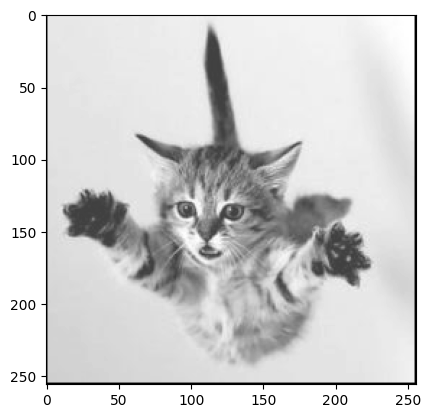

In [61]:

x = np.loadtxt("falling_cat.txt")
plt.imshow(x, cmap="gray")


:::{exercise} 
:label: exercise_4_10

Load the file `falling_cat.txt` into a `numpy` array. Use your code from the previous question to calculate its 1-moving average, then use `plt.imshow` to display the image before and after smoothing. You should end up with two images similar to {numref}`cats_fig`.

Hint: you can use `x.shape` to find the dimensions of the original array.

```
x = np.loadtxt("falling_cat.txt")
plt.imshow(x, cmap="gray")
n, m = x.shape
y = np.zeros((n, m))

```
:::

The 2-dimensional 1-moving average calculates the average across 3 by 3 subarrays centred at each array element. Similarly, we can calculate the k-moving average across $2k+1$ by $2k+1$ subarrays. 

:::{exercise} 
:label: exercise_4_11
Adapt your code so that it calculates the k-moving average of the array `x`.

Then, write a function `moving_average_2d(x, k)` which returns the k-moving average of the 2d array x. Test your function against the cat image for various values of `k`. Bigger values of `k` should result in a more blurry image.

```
def moving_average_2d(x, k):
    # your code here

x = np.loadtxt("falling_cat.txt")
plt.figure()
plt.imshow(x, cmap="gray")


# this should result in a very blurry image
y = moving_average_2d(x, 8)
plt.figure()
plt.imshow(y, cmap="gray")
```
:::